In [32]:
import pandas as pd             #for data manipulation using dataframes
import numpy as np              #for data statistical analysis
%matplotlib inline
import matplotlib.pyplot as plt #for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [33]:
avocado_df = pd.read_csv('avocado.csv')

In [34]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [35]:
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [36]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [37]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [38]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# EXPLORE DATASET

In [39]:
avocado_df = avocado_df.sort_values('Date')

ValueError: could not convert string to float: '2018-03-25'

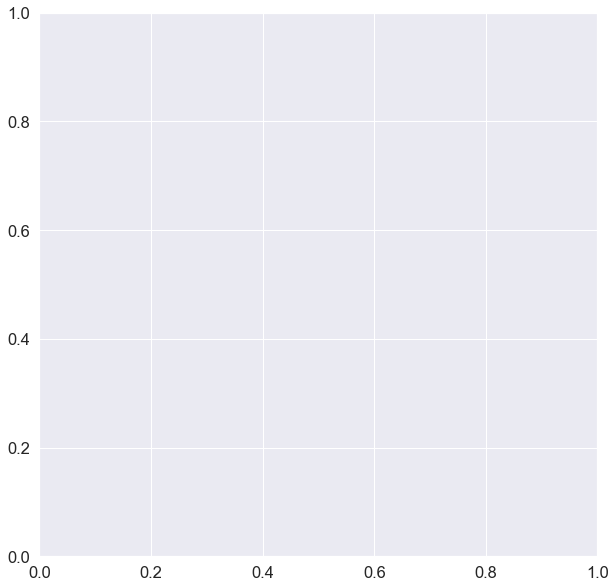

In [40]:

plt.figure(figsize = (10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])
plt.show()

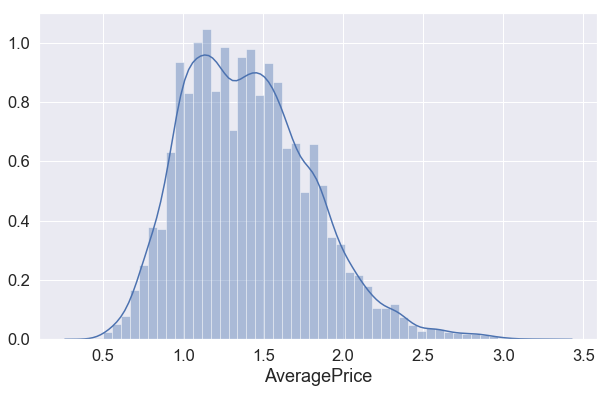

In [41]:
plt.figure(figsize = (10,6))
sns.distplot(avocado_df['AveragePrice'])

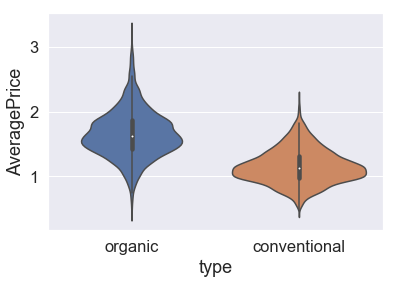

In [42]:
#Plot a violin plot of the average price vs. avocado type
sns.violinplot(y='AveragePrice', x='type', data=avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

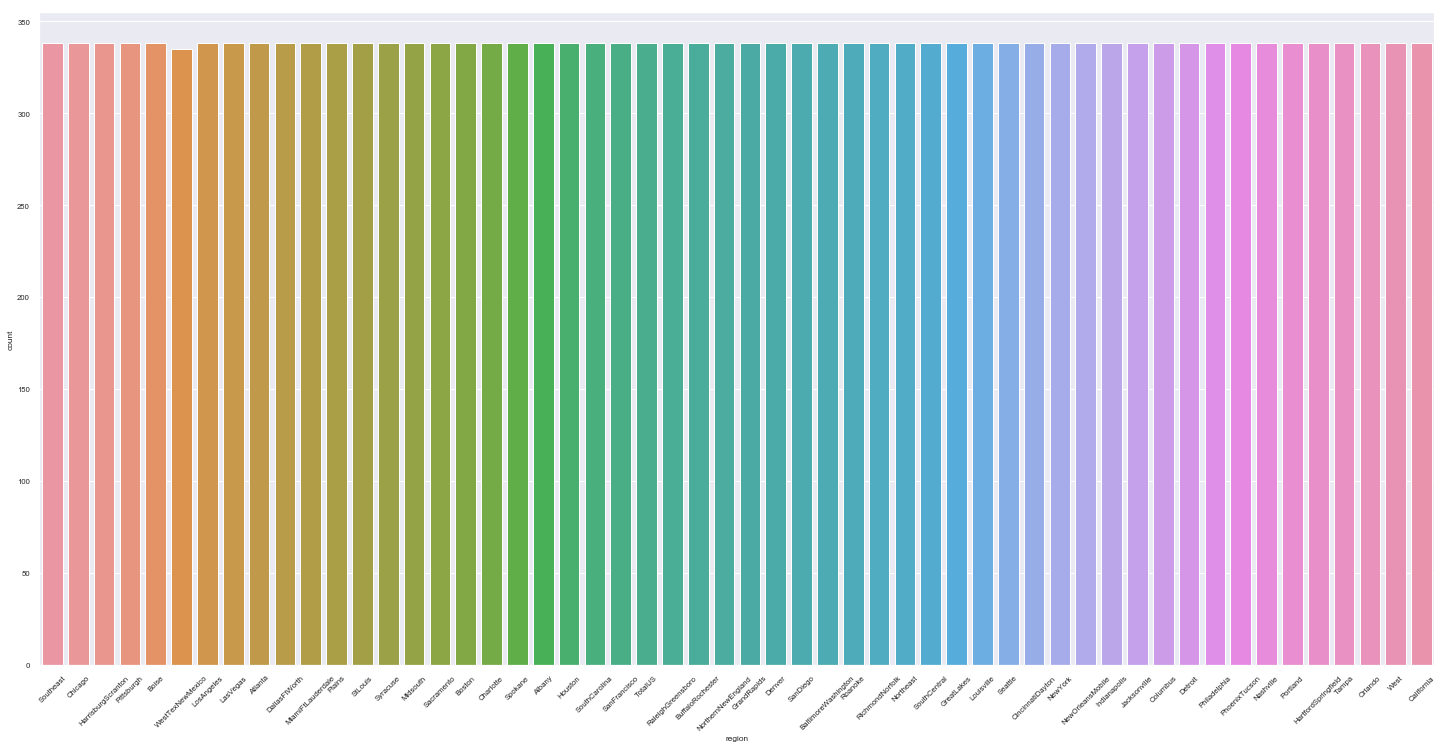

In [43]:
#Bar Chart to indicate the number of regions

sns.set(font_scale = 0.7)
plt.figure(figsize = [25,12])
sns.countplot(x='region', data=avocado_df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

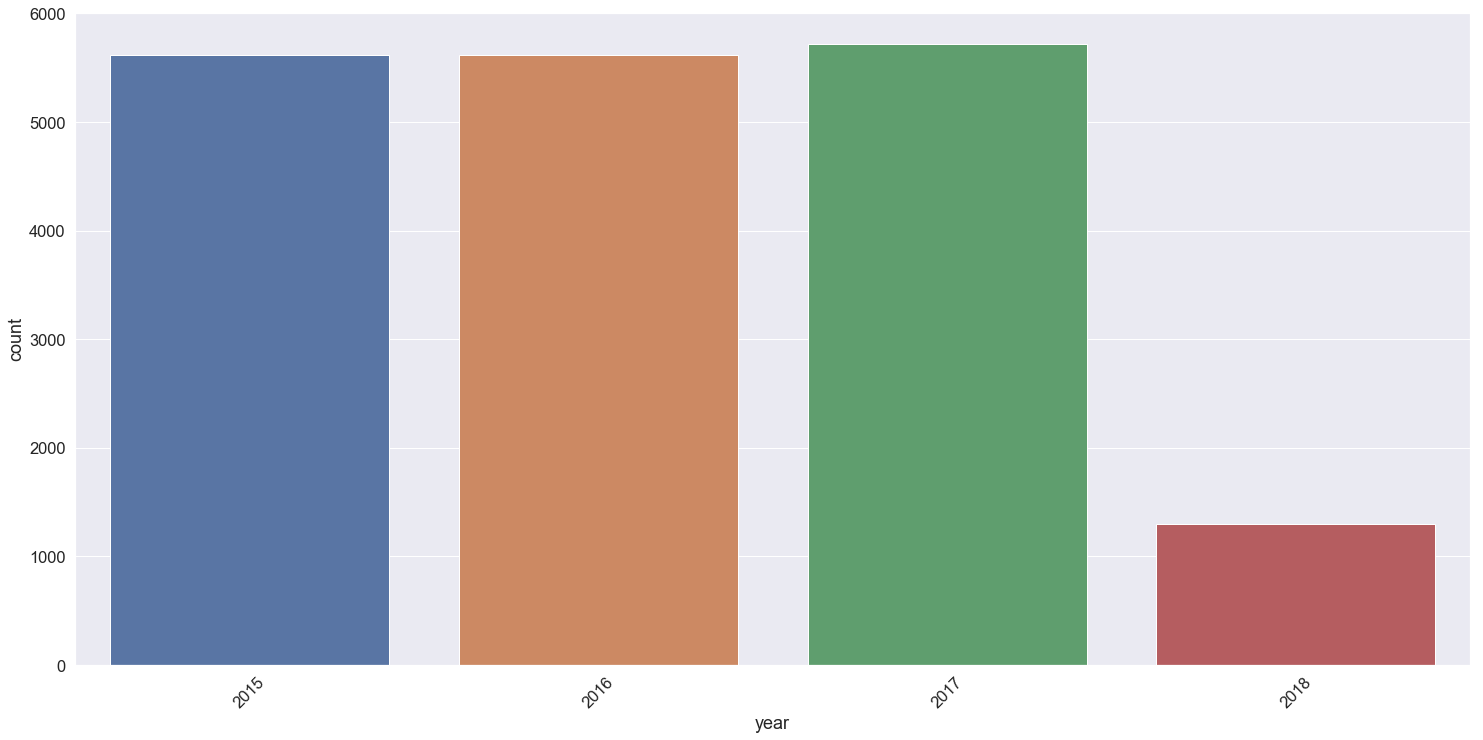

In [44]:
#Bar Chart to indicate the count in every year

sns.set(font_scale = 1.5)
plt.figure(figsize = [25,12])
sns.countplot(x='year', data = avocado_df)
plt.xticks(rotation = 45)

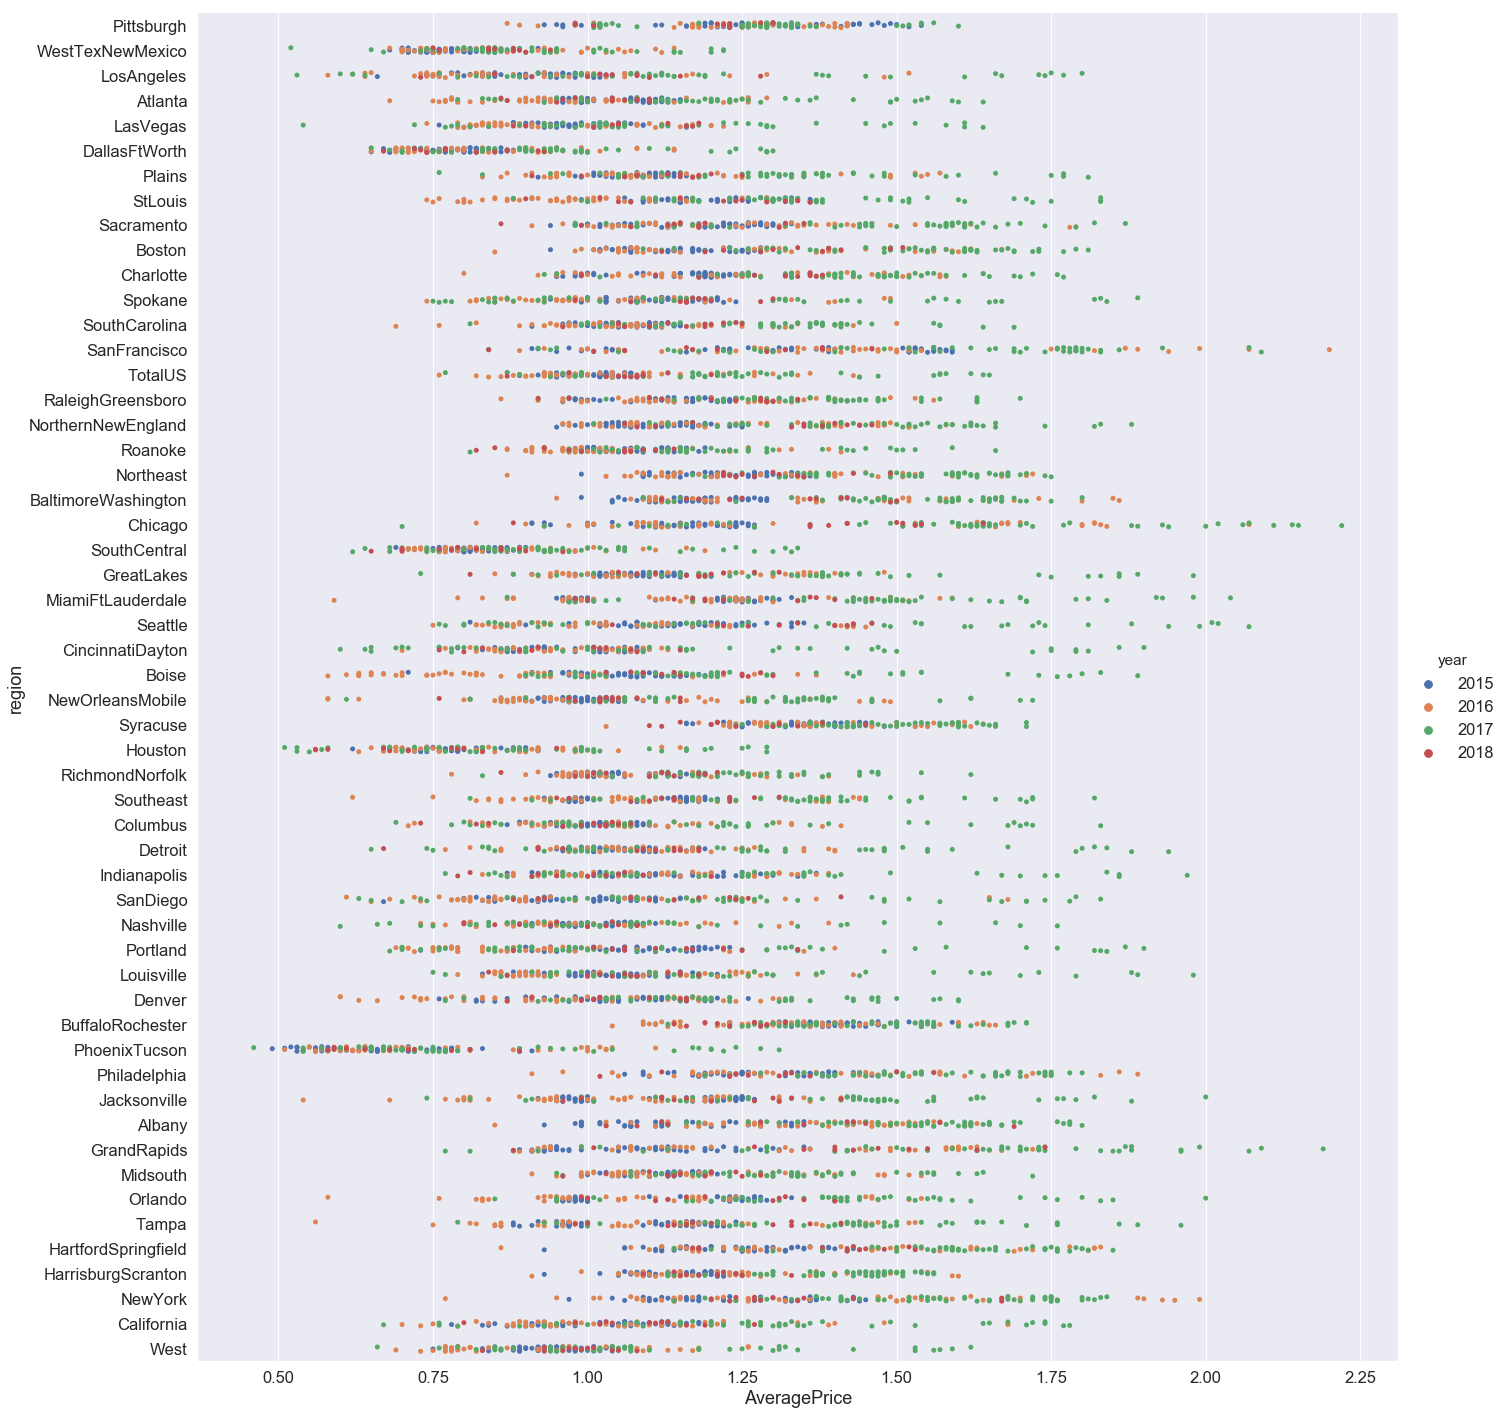

In [45]:
#Plot the avocado prices vs. regions for conventional avocados
#avocado_df = avocado.groupby('AveragePrice').sum()
conventional = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type']=='conventional'],hue ='year',height = 20)

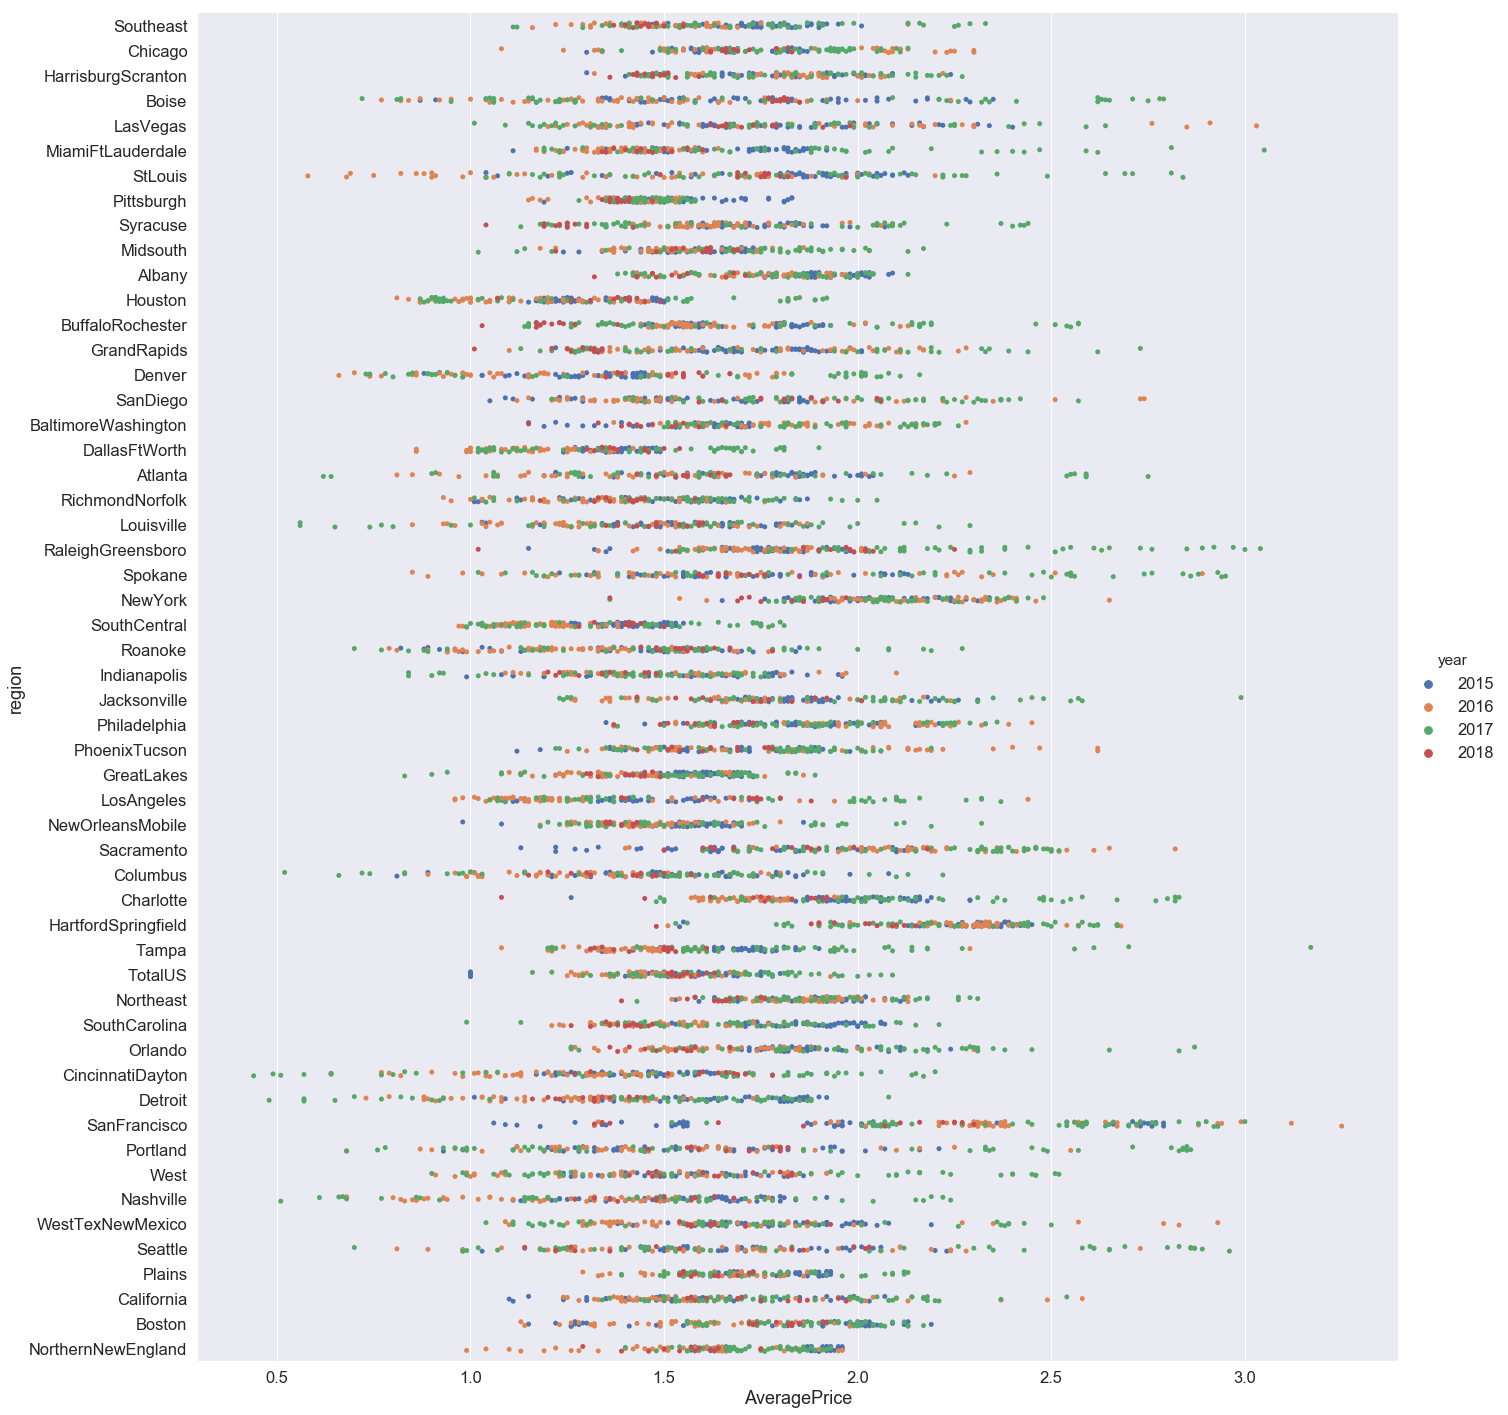

In [46]:
#Plot the avocado prices vs. regions for organic avocados
#avocado_df = avocado.groupby('AveragePrice').sum()
organic = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type']=='organic'],hue ='year',height = 20)


# Prepare the Data before applying Facebook Prophet Tool

In [47]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [48]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [49]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [50]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


# Develop model and make predictions

In [51]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
# Forecasting into the future

future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [53]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,2015-01-04,1.497917,1.497917,1.497917,0.889157,1.888726,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
1,2015-01-04,1.497917,1.497917,1.497917,0.897779,1.845225,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
2,2015-01-04,1.497917,1.497917,1.497917,0.892384,1.860690,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
3,2015-01-04,1.497917,1.497917,1.497917,0.933069,1.870816,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
4,2015-01-04,1.497917,1.497917,1.497917,0.883543,1.853532,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
5,2015-01-04,1.497917,1.497917,1.497917,0.931553,1.922573,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
6,2015-01-04,1.497917,1.497917,1.497917,0.900863,1.868442,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
7,2015-01-04,1.497917,1.497917,1.497917,0.903505,1.867791,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
8,2015-01-04,1.497917,1.497917,1.497917,0.871436,1.880935,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809
9,2015-01-04,1.497917,1.497917,1.497917,0.881716,1.850681,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,-0.113109,-0.113109,-0.113109,1.384809


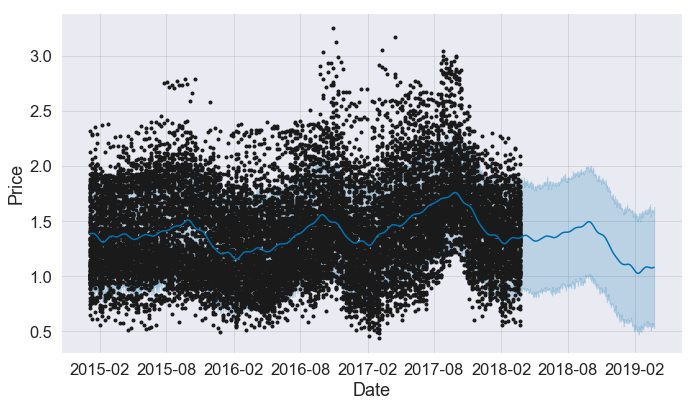

In [54]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

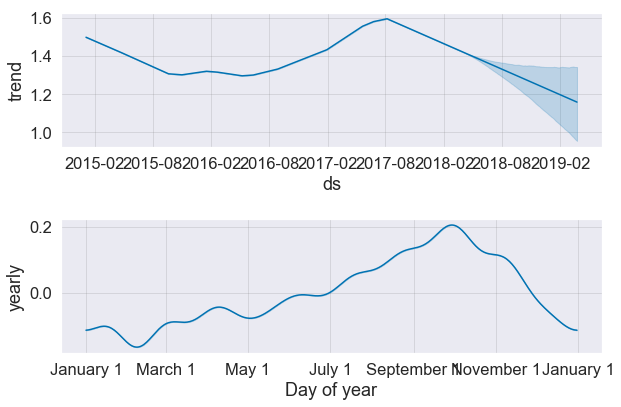

In [55]:
figure2 = m.plot_components(forecast)

# Region Specific Predictions

In [56]:
#dataframes creation for both training and testing datasets
avocado_df = pd.read_csv('avocado.csv')

In [57]:
#Select specific region
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [58]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

ValueError: could not convert string to float: '2018-03-25'

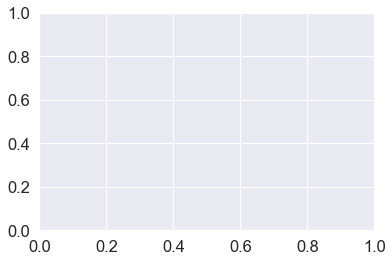

In [60]:
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [61]:
avocado_df_sample= avocado_df_sample.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [65]:
m = Prophet()
m.fit(avocado_df_sample)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


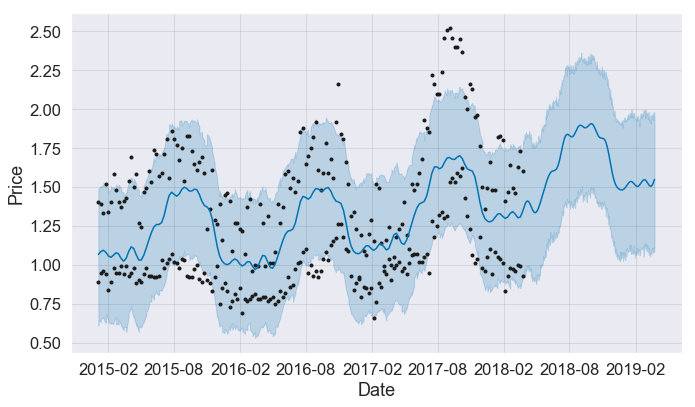

In [66]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

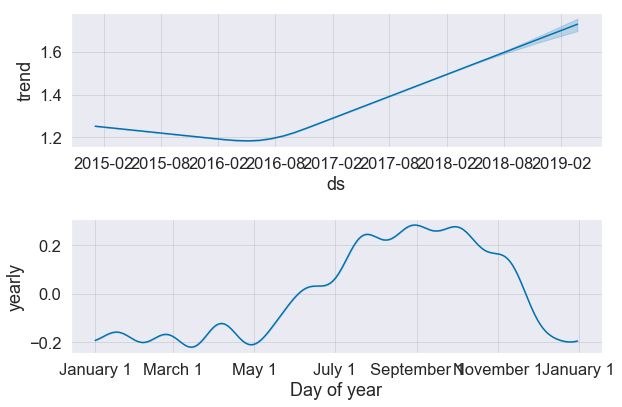

In [67]:
figure3 = m.plot_components(forecast)